In [1]:
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
X_train=np.load("datasets/X_train.npy",allow_pickle=True)
X_test=np.load("datasets/X_test.npy",allow_pickle=True)
y_train=np.load("datasets/y_train.npy",allow_pickle=True)
y_test=np.load("datasets/y_test.npy",allow_pickle=True)

In [3]:
some_digit=X_train[35]
y_train[35]

5

# 3.4 다중 분류 (multiclass_classification)

### 이진 분류기를 활용하는 방법
- 일대다 전략(one-versus-all,one_versus-the-rest,OvA) : 클래스 갯수만큼 이진분류기를 훈련시킨다
    - 대부분의 분류 알고리즘에서 OvA 선호
- 일대일 전략(one-versus-one,OvO) : 클래스의 조합마다 이진분류기를 훈련시킨다. 
    - 각 분류기의 훈련에 전체 훈련세트 중 두 클래스만 필요
    - SVM은 작은 훈련세트에서 많은 분류기를 훈련시키는 쪽이 빠르기 때문에 OvO 선호

In [4]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(max_iter=5,random_state=43)
sgd_clf.fit(X_train,y_train)

sgd_digit_prediction = sgd_clf.predict([some_digit])
sgd_digit_scores = sgd_clf.decision_function([some_digit])

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [5]:
print(sgd_digit_prediction)
print(sgd_digit_scores)
print(np.argmax(sgd_digit_scores))

[5]
[[-289196.97653428 -395691.23756907 -248716.80073497 -486384.05171083
  -349599.06445628  366548.57730945  -45460.95698637 -823651.48557537
  -521603.05192652 -785507.65424711]]
5


In [6]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)

ovo_prediction = ovo_clf.predict([some_digit])
ovo_estimators = ovo_clf.estimators_

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\s

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\s

In [7]:
print(ovo_prediction)
print(len(ovo_estimators)) # 9*10/2

[5]
45


### 다중 분류기를 활용하는 방법

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

forest_prediction=forest_clf.predict([some_digit])
forest_probability=forest_clf.predict_proba([some_digit])

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
print(forest_prediction)
print(forest_probability)

[5]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [10]:
# 스케일링

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91021796, 0.90734537, 0.90918638])

# 3.5 오류 분석

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DASOM\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[[5737    3   26    7   12   44   47    8   37    2]
 [   1 6474   41   28    6   44   10   12  113   13]
 [  62   40 5299  102   83   25  103   63  162   19]
 [  51   38  134 5337    4  248   42   59  126   92]
 [  21   28   36    8 5369    8   56   30   90  196]
 [  72   36   32  191   73 4609  118   27  169   94]
 [  32   23   43    2   39   91 5636    6   44    2]
 [  24   22   65   29   50    8    8 5803   16  240]
 [  58  154   74  171   16  160   56   24 4995  143]
 [  38   32   28   89  169   38    2  204   73 5276]]


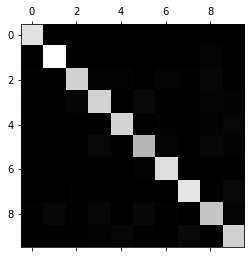

In [12]:
print(conf_mx)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

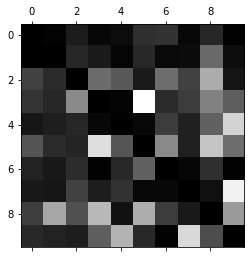

In [13]:
# 예측의 오류를 가시화 해주는 그래프

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# 3.5 다중 레이블 분류 (multilabel classification)
- 하나의 샘플에 대하여 여러개의 이진 레이블을 출력하는 것

In [14]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) # 7보다 큰 숫자를 분류하는 레이블
y_train_odd = (y_train % 2 == 1) # 짝수와 홀수를 분류하는 레이블
y_multilabel = np.c_[y_train_large, y_train_odd] # 두개의 열벡터를 행방향으로 붙임

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 시간 너무 많이 소요
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
#f1_score(y_multilabel, y_train_knn_pred, average="macro")

# 3.6 다중 출력 분류 (multioutput-multiclass classification)
- 하나의 샘플에 대하여 여러개의 다중 레이블을 출력하는 것
- 이미지에서 노이즈 제거 : 픽셀당 하나의 레이블을 가지며(여러개의 레이블) 레이블 값이 1~255이다(다중 출력)

In [ ]:
# 원본 데이터에 노이즈 입히기

train_noise = np.random.randint(0, 100, (len(X_train), 784))
test_noise = np.random.randint(0, 100, (len(X_test), 784))

X_train_mod = X_train + train_noise
X_test_mod = X_test + test_noise

y_train_mod = X_train
y_test_mod = X_test

In [ ]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index]) # 입력 예시
plt.subplot(122); plot_digit(y_test_mod[some_index]) # 출력 예시
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)